In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('../data_sets/credit.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
#The response variable will be 'Balance'

x = df.drop(columns=['Balance'])
y = df['Balance']

#Spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Trying to fit the model in thei current representation throws and error
try:
    test_model = LinearRegression.fit(x_train, y_train)
except Exception as e:
    print('Error!: ', e)
    #The error is due to the fact that the data is not in a numeric format (qualitative data)

Error!:  'DataFrame' object has no attribute '_validate_params'


In [ ]:
#Watch the data types of the columns
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [ ]:
#Fiting the model only with the numeric columns
numeric_features = x.select_dtypes(include='number').columns
print(numeric_features)
model1 = LinearRegression()
model1.fit(x_train[numeric_features], y_train)

#Report train and test R2 scores
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)
print(f'R2 train score: {train_score}')
print(f'R2 train score: {test_score}')

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], dtype='object')
R2 train score: 0.8884475002185803
R2 train score: 0.8212531865399557


In [ ]:
#Look at the values of ethnicity column
print('In the train data, Ethnicity takes on the values:', list(x_train['Ethnicity'].unique()))

In the train data, Ethnicity takes on the values: ['Asian', 'Caucasian', 'African American']


In [ ]:
#Creating test and train design matrices with dummy variables for categorical variables
qualitative_features = x.select_dtypes(exclude='number').columns
x_train_design = pd.get_dummies(x_train, columns=qualitative_features, drop_first=True)
#print(x_train_design)
x_test_design = pd.get_dummies(x_test, columns=qualitative_features, drop_first=True)
x_test_design.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
209,151.947,9156,642,2,91,11,False,True,True,False,False,True,True,False,False
280,53.401,5319,377,3,35,12,False,True,True,False,True,False,True,False,False
33,31.367,1829,162,4,30,10,True,False,True,False,False,True,False,False,True
210,24.543,3206,243,2,62,12,False,True,True,False,False,True,False,False,True
93,16.479,5435,388,2,26,16,True,False,True,False,True,False,True,False,False


In [ ]:
#Confirm that all the datatypes are numeric
x_train_design.dtypes

Income                        float64
Limit                           int64
Rating                          int64
Cards                           int64
Age                             int64
Education                       int64
Gender_ Male                     bool
Gender_Female                    bool
Student_No                       bool
Student_Yes                      bool
Married_No                       bool
Married_Yes                      bool
Ethnicity_African American       bool
Ethnicity_Asian                  bool
Ethnicity_Caucasian              bool
dtype: object

In [ ]:
#fiting model2 on design matrix
model2 = LinearRegression()
model2.fit(x_train_design, y_train)

#Report train and test R2 scores
train_score = model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)
print(f'R2 train score: {train_score}')
print(f'R2 test score: {test_score}')

R2 train score: 0.9552255011405162
R2 test score: 0.9522674050276462


In [ ]:
#Note that the intercept is not a part of .coef_ but instahead stored in .intercept_
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns, columns=['beta value'])
coefs

,beta value
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Gender_ Male,6.246862
Gender_Female,-6.246862
Student_No,-209.217699
Student_Yes,209.217699


[Text(0.5, 1.0, 'Model Coefficients')]

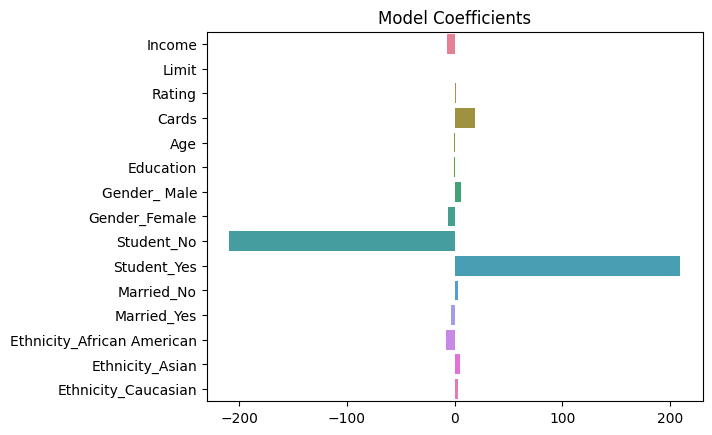

In [ ]:
#Visualize a crude measure of feature importance
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients')

## Fit a model to predict 'Balance' from 2 predictors: 'Income' and the best categorical feature 

In [ ]:
best_cat_feature = 'Student_Yes'
features = ['Income', best_cat_feature]

model3 = LinearRegression()
model3.fit(x_train_design[features], y_train)

beta0= model3.intercept_
beta1 = model3.coef_[features.index('Income')]
beta2 = model3.coef_[features.index(best_cat_feature)]

#Display betas in a DataFrame
coefs = pd.DataFrame([beta0, beta1, beta2], index=['Intercept']+features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


[Text(0.5, 1.0, 'Model Coefficients')]

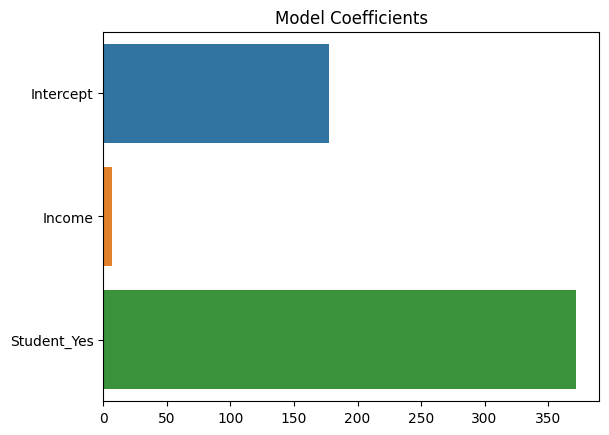

In [ ]:
#Visualize a crude measure of feature importance
sns.barplot(data = coefs.T, orient='h').set(title='Model Coefficients')

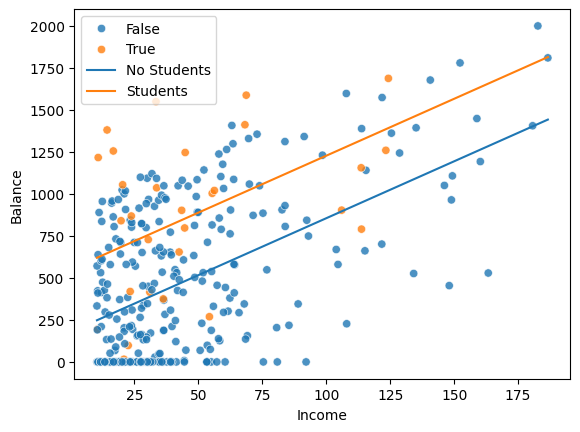

In [ ]:
#Create a space of x values to predict y values
x_space = np.linspace(x['Income'].min(), x['Income'].max(), 1000)

#Generate 2 sets of predictions based on best categorical feature value
#When categorical feature is True (1)
y_hat_yes = beta0 + beta1 * x_space + beta2 * 1
#When categorical feature is False (0)
y_hat_no = beta0 + beta1 * x_space + beta2 * 0

#Plot the 2 predictions for students and non-students
ax = sns.scatterplot(data=pd.concat([x_train_design, y_train], axis=1), x='Income', y='Balance', hue=best_cat_feature, alpha=0.8)
ax.plot(x_space, y_hat_no, label='No Students')
ax.plot(x_space, y_hat_yes, label='Students')
plt.legend()